# HR Attrition — Professional Data Analysis (Python)

This notebook performs a professional end‑to‑end exploratory data analysis (EDA) of the **HR Attrition** dataset.

**Objectives**
- Understand data structure and data quality
- Compute core KPIs (overall attrition rate, average age/income, etc.)
- Explore drivers of attrition by key dimensions (Department, JobRole, Age Group, Gender, BusinessTravel, EducationField)
- Visualize findings with clear, publication‑ready charts (matplotlib only, one chart per cell)
- Produce clean summary tables for portfolio/reports

> Note: This notebook avoids external internet access and relies only on the provided CSV file.

In [1]:
# --- Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Load data
df = pd.read_csv("HR Attrition analysis.csv")

# Quick peek
print("Shape:", df.shape)
df.head()

Shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
# --- Data overview
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nBasic descriptive statistics (numeric):")
df.describe().T


Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [4]:
# --- Light cleaning / feature engineering

# Normalize column names (optional readability)
df.columns = [c.strip().replace(' ', '').replace('/', '_') for c in df.columns]

# Create engineered fields used in analysis
def age_to_group(age):
    if age <= 25: return "20-25"
    elif age <= 35: return "26-35"
    elif age <= 45: return "36-45"
    elif age <= 55: return "46-55"
    else: return "56+"

df['AgeGroup'] = df['Age'].apply(age_to_group)
df['Attrition_Flag'] = (df['Attrition'].str.strip().str.title() == 'Yes').astype(int)

# Sanity checks
print("Unique Attrition values:", df['Attrition'].unique())
print("Age groups:", sorted(df['AgeGroup'].unique()))
df[['Age','AgeGroup','Attrition','Attrition_Flag']].head()

Unique Attrition values: ['Yes' 'No']
Age groups: ['20-25', '26-35', '36-45', '46-55', '56+']


Age AgeGroup Attrition  Attrition_Flag
0   41    36-45       Yes               1
1   49    46-55        No               0
2   37    36-45       Yes               1
3   33    26-35        No               0
4   27    26-35        No               0

In [5]:
# --- Core KPIs
total_employees = len(df)
attrition_count = df['Attrition_Flag'].sum()
attrition_rate = attrition_count / total_employees if total_employees else np.nan

avg_monthly_income = df['MonthlyIncome'].mean()
avg_age = df['Age'].mean()
avg_wlb = df['WorkLifeBalance'].mean()

kpi_table = pd.DataFrame({
    'KPI': [
        'Total Employees', 'Attrition Count', 'Attrition Rate',
        'Average Monthly Income', 'Average Age', 'Average Work Life Balance'
    ],
    'Value': [
        total_employees, attrition_count, attrition_rate,
        avg_monthly_income, avg_age, avg_wlb
    ]
})
kpi_table

KPI        Value
0            Total Employees  1470.000000
1            Attrition Count   237.000000
2             Attrition Rate     0.161224
3     Average Monthly Income  6502.931293
4                Average Age    36.923810
5  Average Work Life Balance     2.761224

In [6]:
# --- Helper: summary function
def attrition_summary(df, by):
    grp = df.groupby(by).agg(
        Employees=('Attrition_Flag','count'),
        Attritions=('Attrition_Flag','sum')
    )
    grp['AttritionRate'] = grp['Attritions'] / grp['Employees']
    return grp.sort_values('AttritionRate', ascending=False)

# Summaries
by_dept = attrition_summary(df, 'Department')
by_role = attrition_summary(df, 'JobRole')
by_ageg = attrition_summary(df, 'AgeGroup')
by_gender = attrition_summary(df, 'Gender')
by_travel = attrition_summary(df, 'BusinessTravel')
by_edu_field = attrition_summary(df, 'EducationField')

# Preview
by_dept, by_role.head(), by_ageg, by_gender, by_travel, by_edu_field.head()

(                        Employees  Attritions  AttritionRate
 Department                                                  
 Sales                         446          92       0.206278
 Human Resources                63          12       0.190476
 Research & Development        961         133       0.138398,
                        Employees  Attritions  AttritionRate
 JobRole                                                    
 Sales Representative          83          33       0.397590
 Laboratory Technician        259          62       0.239382
 Human Resources               52          12       0.230769
 Sales Executive              326          57       0.174847
 Research Scientist           292          47       0.160959,
           Employees  Attritions  AttritionRate
 AgeGroup                                      
 20-25           123          44       0.357724
 26-35           606         116       0.191419
 56+              47           8       0.170213
 46-55           226 

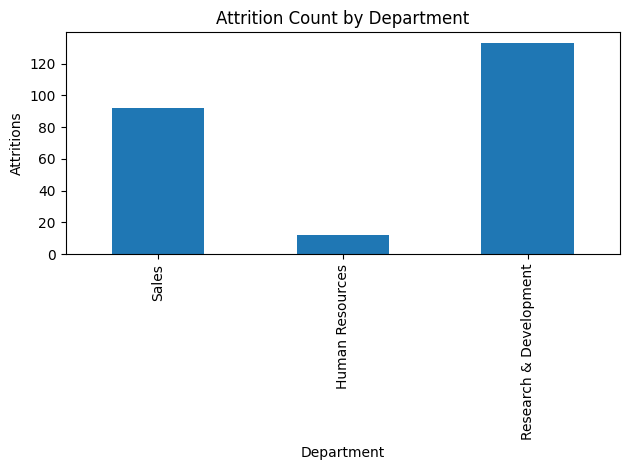

In [7]:
# --- Plot: Attrition by Department (bar)
ax = by_dept[['Attritions']].plot(kind='bar', legend=False)
ax.set_title('Attrition Count by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

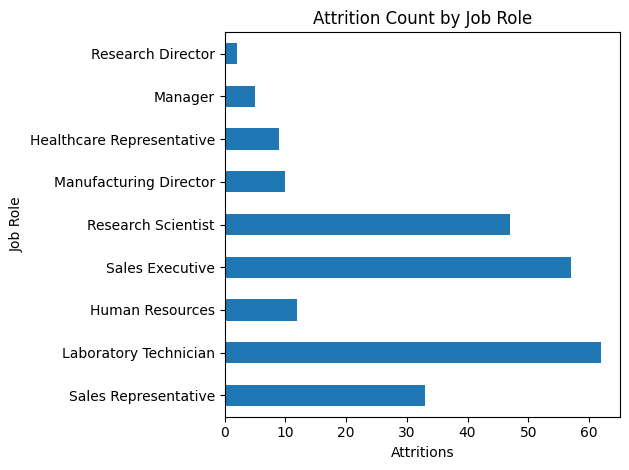

In [8]:
# --- Plot: Attrition by Job Role (horizontal bar)
ax = by_role[['Attritions']].plot(kind='barh', legend=False)
ax.set_title('Attrition Count by Job Role')
ax.set_xlabel('Attritions')
ax.set_ylabel('Job Role')
plt.tight_layout()
plt.show()

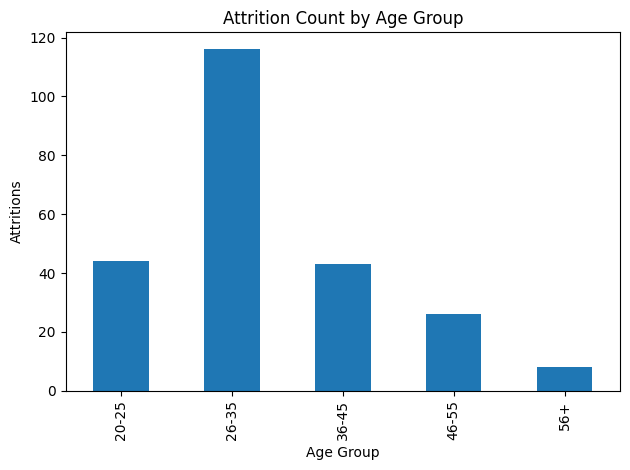

In [9]:
# --- Plot: Attrition by Age Group (column)
order = ['20-25','26-35','36-45','46-55','56+']
ax = by_ageg[['Attritions']].reindex([x for x in order if x in by_ageg.index]).plot(kind='bar', legend=False)
ax.set_title('Attrition Count by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

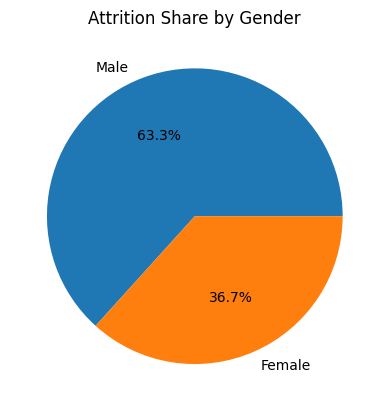

In [10]:
# --- Plot: Attrition by Gender (pie)
fig, ax = plt.subplots()
ax.pie(by_gender['Attritions'], labels=by_gender.index, autopct='%1.1f%%')
ax.set_title('Attrition Share by Gender')
plt.show()

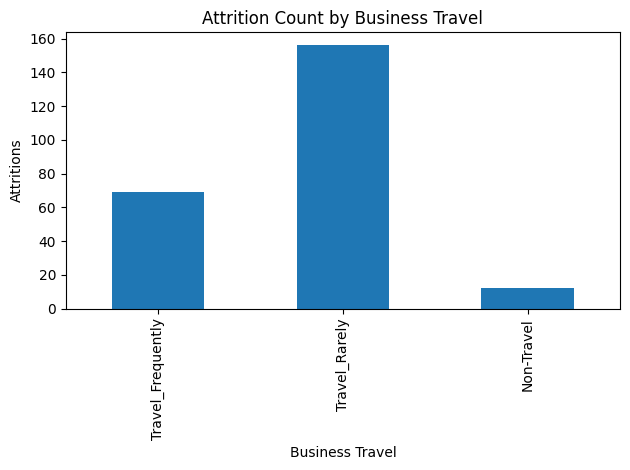

In [11]:
# --- Plot: Attrition by Business Travel (column)
ax = by_travel[['Attritions']].plot(kind='bar', legend=False)
ax.set_title('Attrition Count by Business Travel')
ax.set_xlabel('Business Travel')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

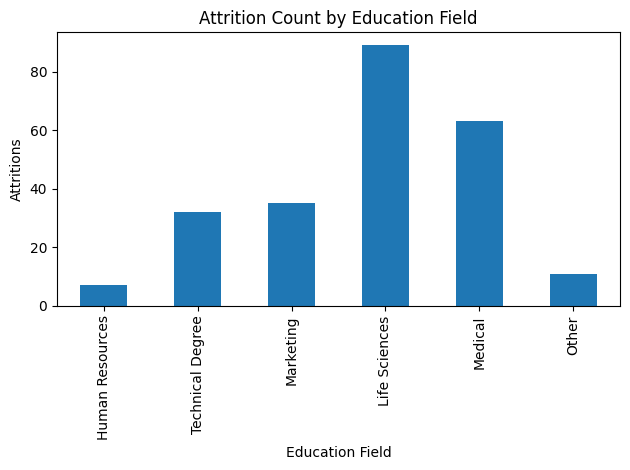

In [12]:
# --- Plot: Attrition by Education Field (bar)
ax = by_edu_field[['Attritions']].plot(kind='bar', legend=False)
ax.set_title('Attrition Count by Education Field')
ax.set_xlabel('Education Field')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_1912\2198526343.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([inc_no.values, inc_yes.values], labels=['No Attrition', 'Attrition'])


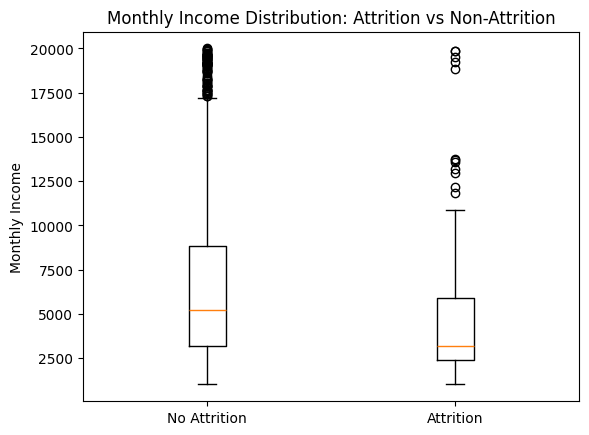

In [13]:
# --- Monthly Income vs Attrition (box plot)
inc_yes = df.loc[df['Attrition_Flag']==1, 'MonthlyIncome'].dropna()
inc_no = df.loc[df['Attrition_Flag']==0, 'MonthlyIncome'].dropna()

fig, ax = plt.subplots()
ax.boxplot([inc_no.values, inc_yes.values], labels=['No Attrition', 'Attrition'])
ax.set_title('Monthly Income Distribution: Attrition vs Non-Attrition')
ax.set_ylabel('Monthly Income')
plt.show()

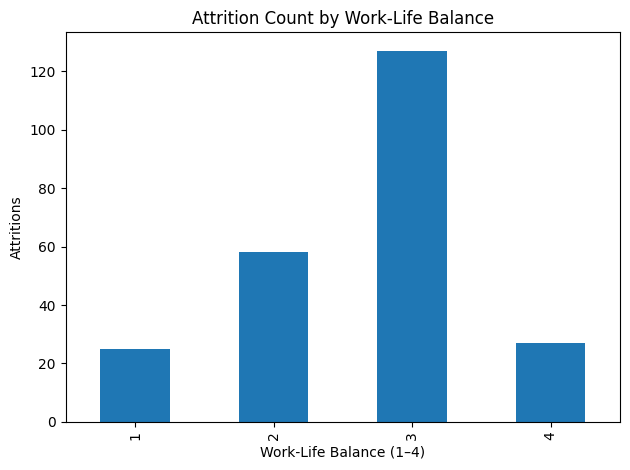

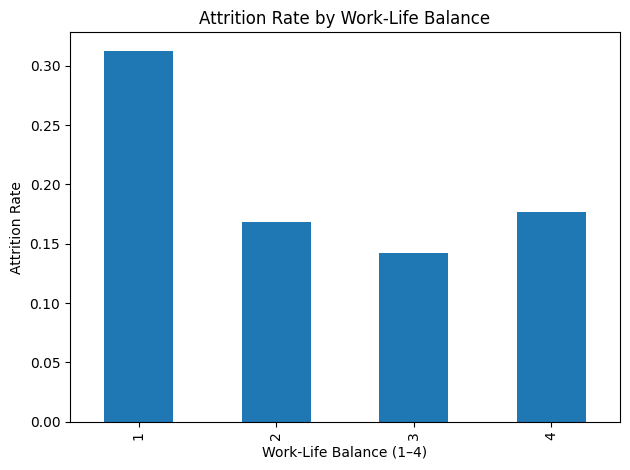

In [14]:
# --- Work-Life Balance vs Attrition (column + rate)
wlb_tab = df.pivot_table(index='WorkLifeBalance', values='Attrition_Flag', aggfunc=['count','sum'])
wlb_tab.columns = ['Employees','Attritions']
wlb_tab['AttritionRate'] = wlb_tab['Attritions'] / wlb_tab['Employees']

ax = wlb_tab[['Attritions']].plot(kind='bar', legend=False)
ax.set_title('Attrition Count by Work-Life Balance')
ax.set_xlabel('Work-Life Balance (1–4)')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

ax = wlb_tab[['AttritionRate']].plot(kind='bar', legend=False)
ax.set_title('Attrition Rate by Work-Life Balance')
ax.set_xlabel('Work-Life Balance (1–4)')
ax.set_ylabel('Attrition Rate')
plt.tight_layout()
plt.show()

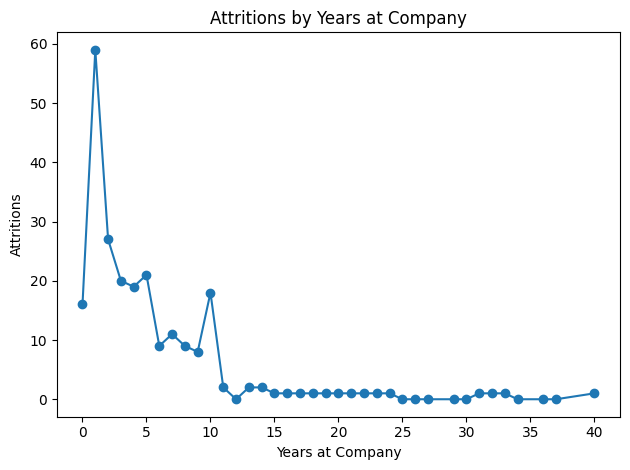

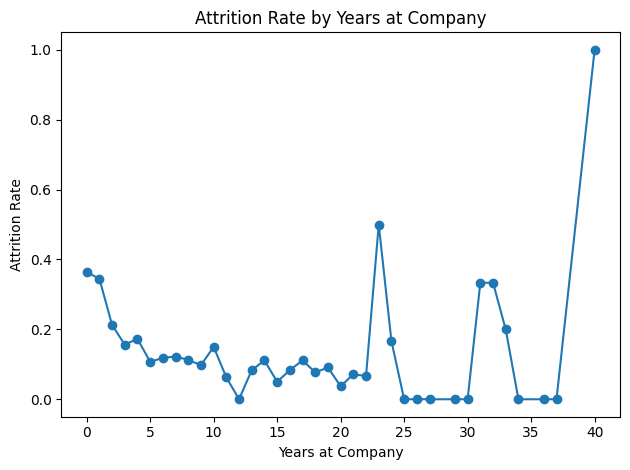

In [15]:
# --- Years at Company vs Attrition (line)
years_tab = df.groupby('YearsAtCompany').agg(
    Employees=('Attrition_Flag','count'),
    Attritions=('Attrition_Flag','sum')
).sort_index()
years_tab['AttritionRate'] = years_tab['Attritions'] / years_tab['Employees']

ax = years_tab[['Attritions']].plot(kind='line', legend=False, marker='o')
ax.set_title('Attritions by Years at Company')
ax.set_xlabel('Years at Company')
ax.set_ylabel('Attritions')
plt.tight_layout()
plt.show()

ax = years_tab[['AttritionRate']].plot(kind='line', legend=False, marker='o')
ax.set_title('Attrition Rate by Years at Company')
ax.set_xlabel('Years at Company')
ax.set_ylabel('Attrition Rate')
plt.tight_layout()
plt.show()

In [16]:
# --- Key insights (auto-generated quick notes)
print(f"Total Employees: {len(df)}")
print(f"Attrition Count: {int(df['Attrition_Flag'].sum())}")
print(f"Attrition Rate: {df['Attrition_Flag'].mean():.2%}")
print("\nTop 5 Job Roles by Attrition Rate:")
display(by_role.sort_values('AttritionRate', ascending=False).head(5))
print("\nDepartments ranked by Attrition Rate:")
display(by_dept.sort_values('AttritionRate', ascending=False))

Total Employees: 1470
Attrition Count: 237
Attrition Rate: 16.12%

Top 5 Job Roles by Attrition Rate:


Employees  Attritions  AttritionRate
JobRole                                                    
Sales Representative          83          33       0.397590
Laboratory Technician        259          62       0.239382
Human Resources               52          12       0.230769
Sales Executive              326          57       0.174847
Research Scientist           292          47       0.160959


Departments ranked by Attrition Rate:


Employees  Attritions  AttritionRate
Department                                                  
Sales                         446          92       0.206278
Human Resources                63          12       0.190476
Research & Development        961         133       0.138398

**End of analysis. Refresh or adapt as needed for your dashboard or report.**